In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir("/content/drive/MyDrive/Data Science Tutorials")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
## set matplotlib defaults;
plt.style.use('fivethirtyeight')
plt.rc(
    'figure', 
    autolayout = True
)
plt.rc(
    'axes', 
    labelsize = 'large', 
    labelweight = 'bold', 
    titlesize = 'large', 
    titleweight = 14, 
    titlepad = 10
)


In [6]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Data Exploration and Cleaning


In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
df['origin'].unique()

array([1, 3, 2])

#### The `origin` Column is categorical not numerical, so we will one-hot-encode the values in the column using `pd.get_dummies` method.

In [10]:
df['origin'] = df['origin'].map({1: '1', 2: '2', 3: '3'})
df = pd.get_dummies(df, columns = ['origin'], prefix = '', prefix_sep = '')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,1,2,3
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0


In [11]:
#to check if one hot encoding worked
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,1,2,3
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,vw pickup,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0
397,31.0,4,119.0,82,2720,19.4,82,chevy s-10,1,0,0


In [12]:
len(df['car name'].unique())

305

Checking horsepower column

In [13]:
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,1,2,3
32,25.0,4,98.0,?,2046,19.0,71,ford pinto,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,ford maverick,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,renault lecar deluxe,0,1,0
336,23.6,4,140.0,?,2905,14.3,80,ford mustang cobra,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,renault 18i,0,1,0
374,23.0,4,151.0,?,3035,20.5,82,amc concord dl,1,0,0


In [14]:
#Since there arent many columns i choose to delete them here
df = df[df.horsepower != '?']

#converting to float type
df.horsepower =df.horsepower.astype('float')
df.cylinders =df.cylinders.astype('float')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Since the number of car models are huge, we just use the brand name.


In [15]:
def getBrandName(s):
  return s.split()[0].lower()

In [16]:
df['brand'] = df['car name'].apply(getBrandName)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,1,2,3,brand
0,18.0,8.0,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0,chevrolet
1,15.0,8.0,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0,buick
2,18.0,8.0,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0,plymouth
3,16.0,8.0,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0,amc
4,17.0,8.0,302.0,140.0,3449,10.5,70,ford torino,1,0,0,ford


In [18]:
len(df['brand'].unique())

37

In [19]:
df = df.drop(columns = ["car name"])

In [20]:
df = pd.get_dummies(df)

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3,brand_amc,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_capri,brand_chevroelt,brand_chevrolet,brand_chevy,brand_chrysler,brand_datsun,brand_dodge,brand_fiat,brand_ford,brand_hi,brand_honda,brand_maxda,brand_mazda,brand_mercedes,brand_mercedes-benz,brand_mercury,brand_nissan,brand_oldsmobile,brand_opel,brand_peugeot,brand_plymouth,brand_pontiac,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_triumph,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw
0,18.0,8.0,307.0,130.0,3504,12.0,70,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8.0,350.0,165.0,3693,11.5,70,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8.0,318.0,150.0,3436,11.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8.0,304.0,150.0,3433,12.0,70,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8.0,302.0,140.0,3449,10.5,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


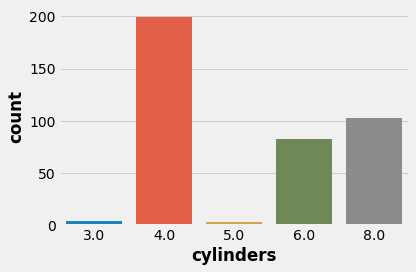

In [22]:
#check how many cylinder cars are most
sns.countplot(df['cylinders'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


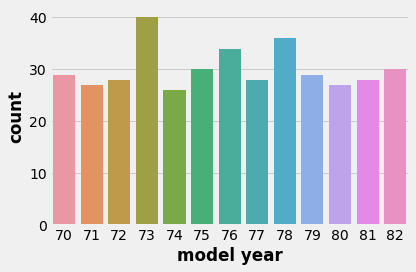

In [23]:
#display most cars are of which model
sns.countplot(df['model year'])
plt.show()

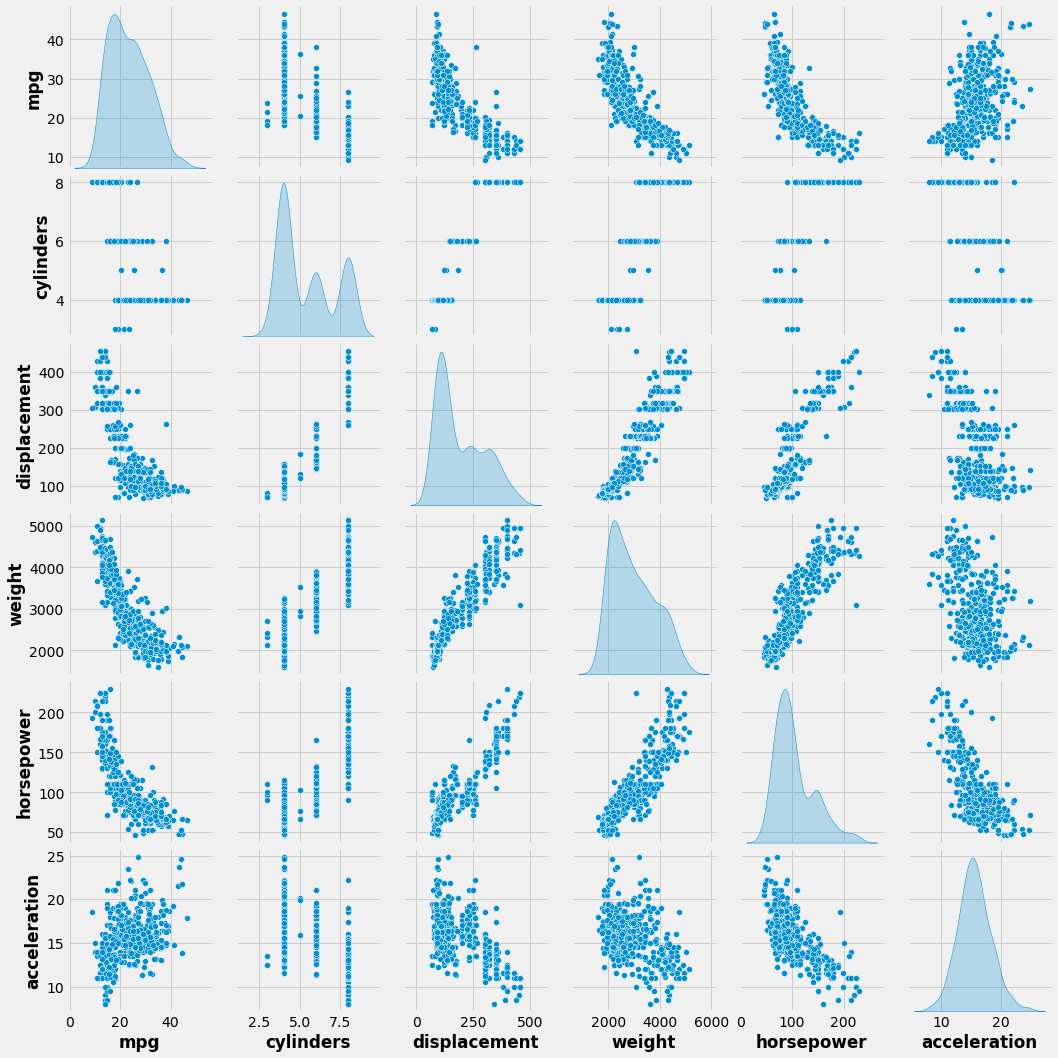

In [24]:
#let's review the joint distribution of a few pairs of columns from the training dataset;
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'weight',"horsepower", "acceleration"]], diag_kind = 'kde')
plt.show()

In [25]:
df[['mpg', 'cylinders', 'displacement', 'weight',"horsepower", "acceleration"]].corr()

,mpg,cylinders,displacement,weight,horsepower,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.832244,-0.778427,0.423329
cylinders,-0.777618,1.000000,0.950823,0.897527,0.842983,-0.504683
displacement,-0.805127,0.950823,1.000000,0.932994,0.897257,-0.543800
weight,-0.832244,0.897527,0.932994,1.000000,0.864538,-0.416839
horsepower,-0.778427,0.842983,0.897257,0.864538,1.000000,-0.689196
acceleration,0.423329,-0.504683,-0.543800,-0.416839,-0.689196,1.000000


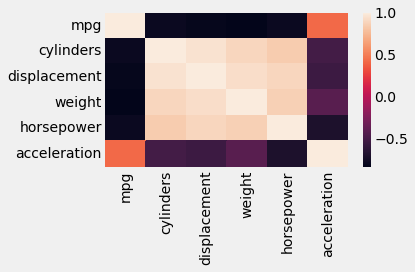

In [26]:
sns.heatmap(df[['mpg', 'cylinders', 'displacement', 'weight',"horsepower", "acceleration"]].corr(method = "pearson"))

Looking at the result, we can draw some conclusions about our dataset:


*   **MPG** is strongly correlated with cylinders, displacement , horsepower and weight .An increase in their values means a decrease in the mileage per gallon which seems right: a heavy vehicule, with a powerful engine and great horsepower would consume more energy, thus the low mileage per gallon
*   The independent variables that we are intending to use in our regression are also correlated ie there is a multicolinearity


In [27]:
## now we will split the data into train and test datasets, so we will use the test set in the final evaluation of our models;
train_df = df.sample(frac = 0.8, random_state = 0)
test_df = df.drop(train_df.index)

In [28]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
1,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
2,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
3,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


### split the target feature wich is `mpg` feature, set it as label feature

In [29]:

train_labels = train_df['mpg'].copy()
test_labels = test_df['mpg'].copy()
train = train_df.drop(columns = ['mpg'])
test = test_df.drop(columns = ['mpg'])

In [30]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(train.values)
x_test = min_max_scaler.transform(test.values)

In [31]:
x_train[0]

array([0.2       , 0.05684755, 0.16201117, 0.13635062, 0.38690476,
       0.33333333, 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [32]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(x_train, train_labels)
print("R-square score on test dataset",regr.score(x_test, test_labels))

R-square score on test dataset -2.589447409106897e+22


In [33]:
print("R-square score on train dataset",regr.score(x_train, train_labels))

R-square score on train dataset 0.862485682029858


In [34]:
pred = regr.predict(x_test)
res = pd.DataFrame({"y": test_labels, "pred":pred})
res["difference"] = res['y'] - res['pred']
res.tail()

,y,pred,difference
369,34.0,28.582031,5.417969
375,36.0,32.750000,3.250000
382,34.0,32.734375,1.265625
384,32.0,37.242188,-5.242188
396,28.0,26.851562,1.148438


In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_labels, pred, squared = False)

1300416480309.4116

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_labels, regr.predict(x_train), squared = False)

2.861442721606577

### What is multicollinearity and why is it a problem in a regression analysis:
Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high, it can cause problems when you fit the model and interpret the results.

The idea behind a regression is to capture the effect of each variable on our dependent variable.That being said,we aim to change the value of an independent variable whereas the others are constant, and then study the effect. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable(s). Thus, you will not be able to isolate the effect of your independent variable.

### Trying out with only some characteristics
Since we have a problem of multicollinearity, we will try to fit a new model by only keeping the variables that have significant effect on mpg

In [37]:
train_labels = train_df['mpg'].copy()
test_labels = test_df['mpg'].copy()
train = train_df.drop(columns = ['mpg'])
test = test_df.drop(columns = ['mpg'])

In [38]:
train = train[['cylinders', 'displacement', 'weight',"horsepower", "acceleration"]]
test = test[['cylinders', 'displacement', 'weight',"horsepower", "acceleration"]]


In [39]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(train.values)
x_test = min_max_scaler.transform(test.values)

In [40]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(x_train, train_labels)
print("R-square score on test dataset",regr.score(x_test, test_labels))

R-square score on test dataset 0.7579355140006467


In [41]:
print("R-square score on train dataset",regr.score(x_train, train_labels))

R-square score on train dataset 0.6909246503147817


In [42]:
pred = regr.predict(x_test)
res = pd.DataFrame({"y": test_labels, "pred":pred})
res["diff"] = res['y'] - res['pred']
res.tail()

,y,pred,diff
369,34.0,27.356956,6.643044
375,36.0,30.479763,5.520237
382,34.0,29.227794,4.772206
384,32.0,30.941528,1.058472
396,28.0,26.696235,1.303765


In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_labels, pred, squared = False)

3.975982424162081

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_labels, regr.predict(x_train), squared = False)

4.289861607985112

### Conclusion

The accuracy of the results depend more on the training set we use to learn the relationship between then the variable mpg and the independant variables. Hence, it appears that tuning the parameters is necessary to avoid the problem of overfitting.

